In [7]:
from palCont import odeContinuation
import vegModel
import numpy as np
import numdifftools as nd
%matplotlib notebook
import matplotlib.pylab as plt

In [2]:
m = vegModel.eta()

dbdt =  b*w*(-b + 1.0)*(b*e + 1.0)**2 - b
dwdt  =  -b*g*w*(b*e + 1.0)**2 - l*w/(b*r + 1.0) + p*(a*cos(omegaf*t) + 1.0)
Local Jacobian: Matrix([[2*b*e*w*(-b + 1.0)*(b*e + 1.0) - b*w*(b*e + 1.0)**2 + w*(-b + 1.0)*(b*e + 1.0)**2 - 1, b*(-b + 1.0)*(b*e + 1.0)**2], [-2*b*e*g*w*(b*e + 1.0) - g*w*(b*e + 1.0)**2 + l*r*w/(b*r + 1.0)**2, -b*g*(b*e + 1.0)**2 - l/(b*r + 1.0)]])
Time to setup:  0.821406841278


In [3]:
t,sol = m.ode_integrate([0.3,0.4],p=0.7,a=0.0)
#plt.plot(t,sol[0])

Updating parameters:
a=0.0
p=0.7


In [4]:
cont = odeContinuation(m,"p",sol.T[-1],m.p['p'],0.01)

In [5]:
cont.eqrhs([0.3471060332363533, 0.3200006350910965],0.7)

array([ -3.74999476e-11,   2.83391643e-11])

In [8]:
Jfun = nd.Jacobian(cont.eqrhs)

In [18]:
np.allclose(Jfun([0.3471060332363533, 0.3200006350910965],0.7),cont.Gu(0.3471060332363533, 0.3200006350910965,0.7))
%timeit Jfun([0.3471060332363533, 0.3200006350910965],0.7)
%timeit cont.Gu(0.3471060332363533, 0.3200006350910965,0.7)

100 loops, best of 3: 2.73 ms per loop
10000 loops, best of 3: 19.9 µs per loop


<IPython.core.display.Javascript object>


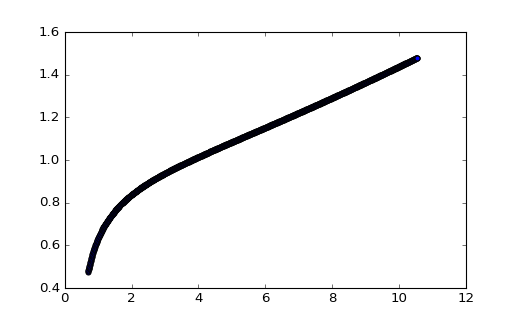

In [6]:
# Perform continuation for defined number of steps
steps = 1000

fig = plt.figure(figsize=(4*1.618,4))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

for i in range(steps):
    cont.pt_type=""
    cont.step()
    ax.scatter(cont.h_n,np.linalg.norm(cont.u_n))
    fig.canvas.draw()